In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
from dataset_creation import (
    MultiScaleImageSampler, 
    ImageChunkSummarizerOptions, 
    MultiScaleImageEncoder, 
    MultiScaleImageDecoder, 
    ImageAtScale, 
    CityscapesDatasetFactory, 
    CityScapesDataset
)

0.npy,1.npy,2.npy,3.npy,4.npy,5.npy,6.npy,7.npy,8.npy,9.npy,10.npy,11.npy,12.npy,13.npy,14.npy,15.npy,16.npy,17.npy,18.npy,19.npy,20.npy,21.npy,22.npy,23.npy,24.npy,25.npy,26.npy,27.npy,28.npy,29.npy,30.npy,31.npy,32.npy,33.npy,34.npy,35.npy,36.npy,37.npy,38.npy,39.npy,40.npy,41.npy,42.npy,43.npy,44.npy,45.npy,46.npy,47.npy,48.npy,49.npy,50.npy,51.npy,52.npy,53.npy,54.npy,55.npy,56.npy,57.npy,58.npy,59.npy,60.npy,61.npy,62.npy,63.npy,64.npy,65.npy,66.npy,67.npy,68.npy,69.npy,70.npy,71.npy,72.npy,73.npy,74.npy,75.npy,76.npy,77.npy,78.npy,79.npy,80.npy,81.npy,82.npy,83.npy,84.npy,85.npy,86.npy,87.npy,88.npy,89.npy,90.npy,91.npy,92.npy,93.npy,94.npy,95.npy,96.npy,97.npy,98.npy,99.npy,100.npy,


C:\Users\Kevin\Downloads\UW-Vision-Segmentation-main\dataset_creation.py:681: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - self.raw_feature_min) / feature_range
C:\Users\Kevin\Downloads\UW-Vision-Segmentation-main\dataset_creation.py:700: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - feature_min) / feature_range


(500000, 30)
(500000, 701)


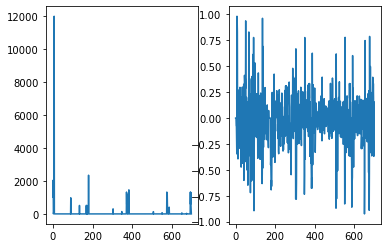

In [2]:
# Load the input
dataset = CityScapesDataset("full_dataset_v1_500000")
dataset.load()
normalized_features = dataset.get_normalized_features()
print(dataset.labels.shape)
print(dataset.features.shape)
sample_feature = dataset.features[0]
sample_feature_normalized = normalized_features[0]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sample_feature)
ax2.plot(sample_feature_normalized)

In [3]:
test_features = normalized_features[0: 12000]
test_labels = dataset.labels[0: 12000]
train_features = normalized_features
train_labels = dataset.labels
print(test_features.shape)
print(train_features.shape)
print(test_labels.shape)
print(train_labels.shape)
test_features[np.isnan(test_features)] = 0
train_features[np.isnan(train_features)] = 0

(12000, 701)
(500000, 701)
(12000, 30)
(500000, 30)


In [4]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [98]:
model = tf.keras.models.Sequential()
model.add(Dense(units=64, input_shape=(701,), activation=tf.nn.relu))
model.add(Dense(units=32, activation=tf.nn.relu))
model.add(Dense(units=30, activation=tf.nn.softmax))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                44928     
_________________________________________________________________
dense_73 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_74 (Dense)             (None, 30)                990       
Total params: 47,998
Trainable params: 47,998
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
print(y_train.shape)
print(train_labels.shape)

(500000, 30, 2)
(500000, 30)


In [97]:
model.fit(x=train_features, y=train_labels, epochs = 57)

Train on 500000 samples
Epoch 1/57
500000/500000 [==============================] - 20s 40us/sample - loss: 0.0047 - accuracy: 0.7535
Epoch 2/57
500000/500000 [==============================] - 22s 43us/sample - loss: 0.0043 - accuracy: 0.7715
Epoch 3/57
500000/500000 [==============================] - 21s 42us/sample - loss: 0.0040 - accuracy: 0.7850
Epoch 4/57
500000/500000 [==============================] - 22s 44us/sample - loss: 0.0038 - accuracy: 0.7951
Epoch 5/57
500000/500000 [==============================] - 22s 43us/sample - loss: 0.0037 - accuracy: 0.8031
Epoch 6/57
500000/500000 [==============================] - 24s 48us/sample - loss: 0.0035 - accuracy: 0.8103
Epoch 7/57
500000/500000 [==============================] - 23s 46us/sample - loss: 0.0034 - accuracy: 0.8160
Epoch 8/57
500000/500000 [==============================] - 23s 46us/sample - loss: 0.0033 - accuracy: 0.8215
Epoch 9/57
500000/500000 [==============================] - 22s 44us/sample - loss: 0.0032 - acc

In [81]:
print(test_features.shape)
print(test_labels.shape)
loss, accuracy = model.evaluate(test_features, test_labels, verbose=True)
print(loss)
print(accuracy)

(12000, 701)
(12000, 30)
12000/12000 [==============================] - 0s 23us/sample - loss: 0.0032 - accuracy: 0.8327
0.003179625158663839
0.8326667


In [82]:
model.save('C:\\Users\\Kevin\\Downloads\\UW-Vision-Segmentation-main\\models\\47,998my_model.h5')

In [83]:
prediction = model.predict(test_features)

In [84]:
accurate = 0
for ind in range(1000):
    p1 = str(np.where(prediction[ind]==max(prediction[ind])))
    p2 = str(np.where(train_labels[ind]==max(train_labels[ind])))
    if p1 == p2:
        accurate += 1
        
print(accurate)

841


In [85]:
model = keras.models.load_model('C:\\Users\\Kevin\\Downloads\\UW-Vision-Segmentation-main\\models\\845,982my_model.h5')

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices())
print(tf.test.gpu_device_name())

2.1.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

